# Proyek Predictive Analytics: Diabetes-prediction
- Nama: Rezaldi
- Email: rezaldi30082003@students.amikom.ac.id
- Id Dicoding: rezaldi_20113717
- Dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Import library

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.ensemble import IsolationForest
import numpy as np

## Data Understanding

### Data Collection

In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv('diabetes_prediction_dataset.csv')
# Display the first 5 rows of the data
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Data Description

In [3]:
# Display the shape of the data
print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset contains 100000 rows and 9 columns.


In [4]:
# Display the data types of each column
print('\nThe data types of each column are:')
print(data.dtypes)


The data types of each column are:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [5]:
# Display summary statistics for the numerical columns
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
# Display the number of missing values in each column
print('Number of missing values in each column:')
print(data.isnull().sum())

Number of missing values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [7]:
# Display the number of unique values in each column
print('\nNumber of unique values in each column:')
print(data.nunique())


Number of unique values in each column:
gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64


In [8]:
# Display the frequency counts for categorical columns
for col in data.select_dtypes(include='object').columns:
    print(f'\nFrequency counts for {col}:')
    print(data[col].value_counts())


Frequency counts for gender:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Frequency counts for smoking_history:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


### Exploratory Data Analysis (EDA)

#### Data visualization

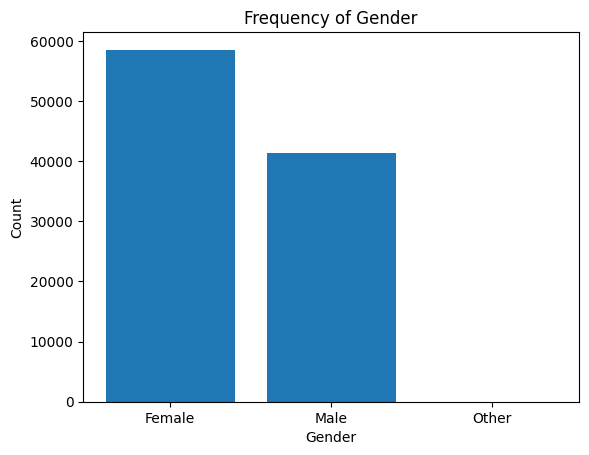

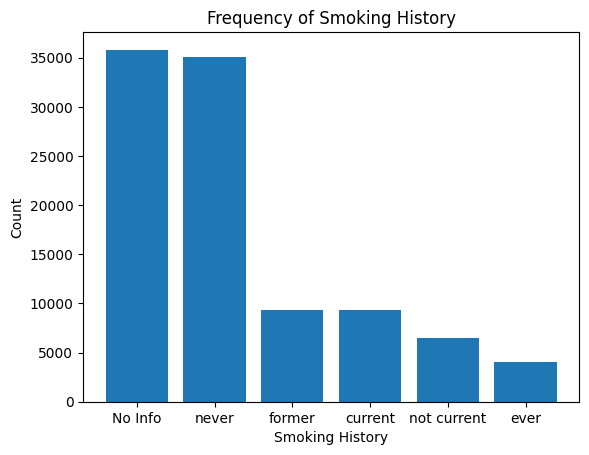

In [9]:
# Grafik batang untuk variabel jenis kelamin (gender)
gender_counts = data['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Frequency of Gender')
plt.show()

# Grafik batang untuk variabel riwayat merokok (smoking_history)
smoking_counts = data['smoking_history'].value_counts()
plt.bar(smoking_counts.index, smoking_counts.values)
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.title('Frequency of Smoking History')
plt.show()

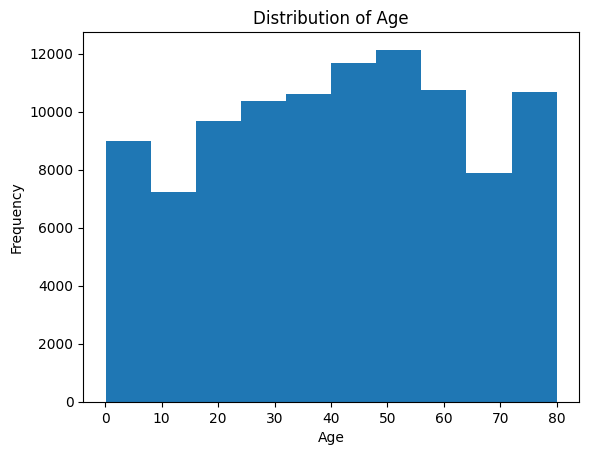

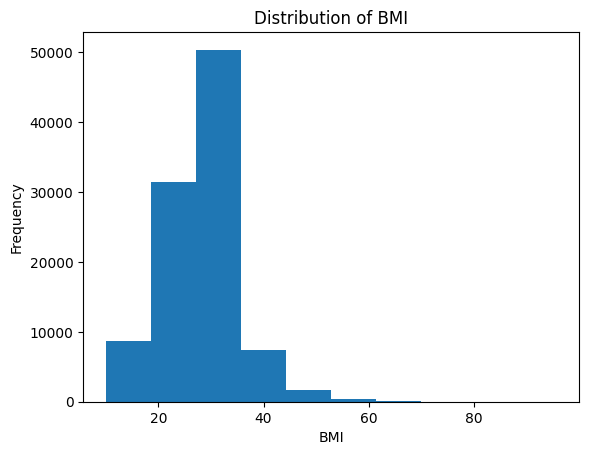

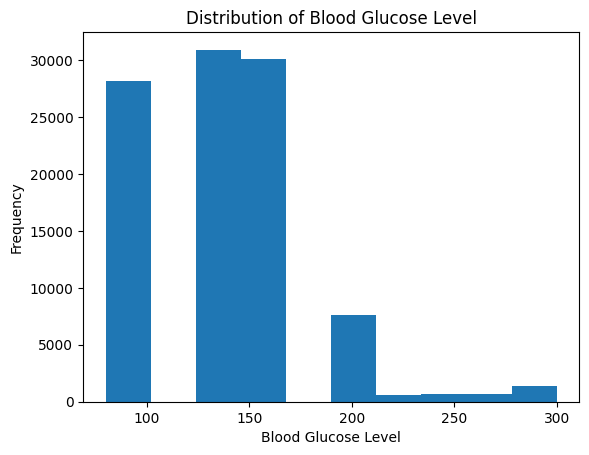

In [10]:
# Histogram untuk variabel usia (age)
plt.hist(data['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Histogram untuk variabel indeks massa tubuh (bmi)
plt.hist(data['bmi'], bins=10)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

# Histogram untuk variabel tingkat glukosa darah (blood_glucose_level)
plt.hist(data['blood_glucose_level'], bins=10)
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Blood Glucose Level')
plt.show()

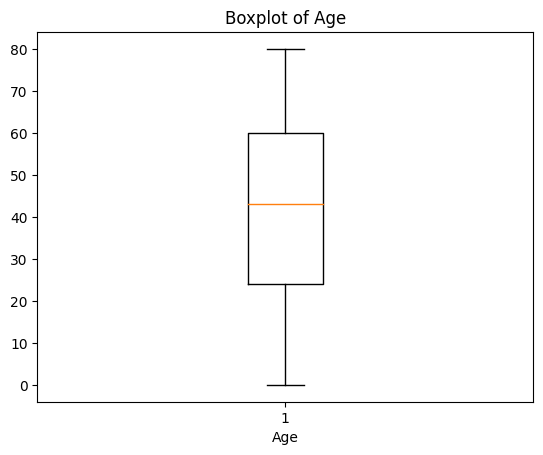

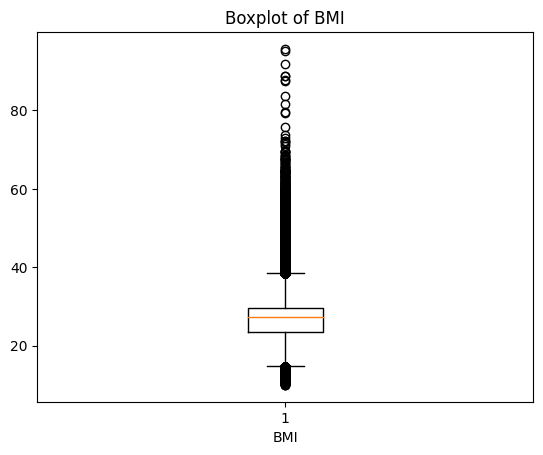

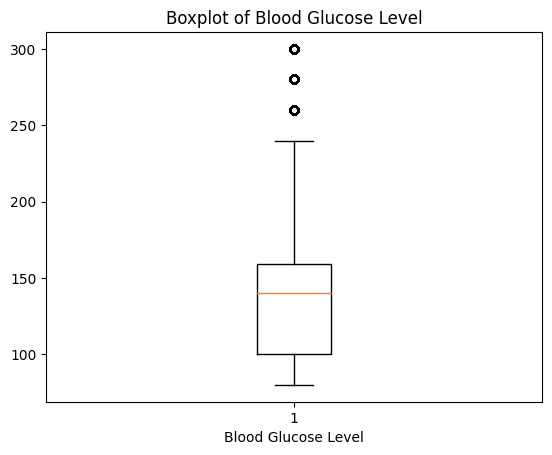

In [11]:
# Boxplot untuk variabel usia (age)
plt.boxplot(data['age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()

# Boxplot untuk variabel indeks massa tubuh (bmi)
plt.boxplot(data['bmi'])
plt.xlabel('BMI')
plt.title('Boxplot of BMI')
plt.show()

# Boxplot untuk variabel tingkat glukosa darah (blood_glucose_level)
plt.boxplot(data['blood_glucose_level'])
plt.xlabel('Blood Glucose Level')
plt.title('Boxplot of Blood Glucose Level')
plt.show()



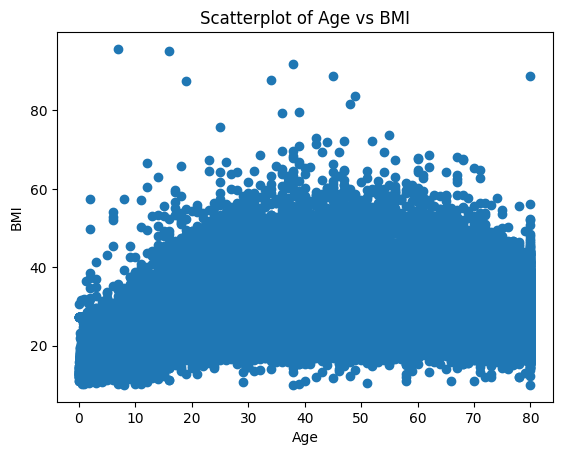

In [12]:
# Scatterplot untuk hubungan antara usia (age) dan indeks massa tubuh (bmi)
plt.scatter(data['age'], data['bmi'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatterplot of Age vs BMI')
plt.show()

#### Pengujian hipotesis statistik

In [13]:
# Pisahkan data menjadi dua kelompok berdasarkan diabetes
diabetes_group = data[data['diabetes'] == 1]
non_diabetes_group = data[data['diabetes'] == 0]

# Lakukan uji t
t_statistic, p_value = stats.ttest_ind(diabetes_group['bmi'], non_diabetes_group['bmi'], equal_var=False)

# Tampilkan hasil uji
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Ambil alpha level (biasanya 0.05)
alpha = 0.05

# Tentukan apakah hasil uji statistik signifikan
if p_value < alpha:
    print('Terdapat perbedaan signifikan dalam rata-rata BMI antara pasien diabetes dan non-diabetes.')
else:
    print('Tidak terdapat perbedaan signifikan dalam rata-rata BMI antara pasien diabetes dan non-diabetes.')

T-Statistic: 60.26512781229193
P-Value: 0.0
Terdapat perbedaan signifikan dalam rata-rata BMI antara pasien diabetes dan non-diabetes.


In [14]:
# Pisahkan data menjadi kelompok berdasarkan riwayat merokok
groups = [data[data['smoking_history'] == 'never']['bmi'],
          data[data['smoking_history'] == 'former']['bmi'],
          data[data['smoking_history'] == 'current']['bmi']]

# Lakukan uji ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Tampilkan hasil uji
print(f'F-Statistic: {f_statistic}')
print(f'P-Value: {p_value}')

# Ambil alpha level (biasanya 0.05)
alpha = 0.05

# Tentukan apakah hasil uji statistik signifikan
if p_value < alpha:
    print('Terdapat perbedaan signifikan dalam rata-rata BMI antara kelompok berbeda berdasarkan riwayat merokok.')
else:
    print('Tidak terdapat perbedaan signifikan dalam rata-rata BMI antara kelompok berbeda berdasarkan riwayat merokok.')


F-Statistic: 198.60221043368796
P-Value: 1.162535030548748e-86
Terdapat perbedaan signifikan dalam rata-rata BMI antara kelompok berbeda berdasarkan riwayat merokok.


In [15]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(data['gender'], data['diabetes'])
print(contingency_table)

diabetes      0     1
gender               
Female    54091  4461
Male      37391  4039
Other        18     0


In [16]:
# Melakukan Pengujian Chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

Chi-square Value: 143.21825102550298
P-Value: 7.953383718307458e-32
Degrees of Freedom: 2
Expected Frequencies Table:
[[5.357508e+04 4.976920e+03]
 [3.790845e+04 3.521550e+03]
 [1.647000e+01 1.530000e+00]]


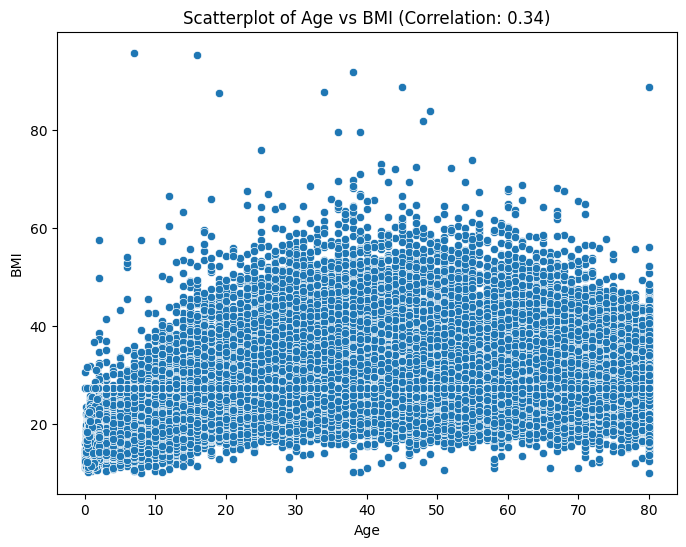

Correlation between age and BMI: 0.34


In [17]:
# Hitung korelasi antara usia (age) dan indeks massa tubuh (bmi) menggunakan metode Pearson
correlation = data['age'].corr(data['bmi'], method='pearson')

# Visualisasi scatterplot antara usia (age) dan indeks massa tubuh (bmi)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi', data=data)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title(f'Scatterplot of Age vs BMI (Correlation: {correlation:.2f})')
plt.show()

# Menampilkan nilai korelasi
print(f'Correlation between age and BMI: {correlation:.2f}')

#### Deteksi anomali

In [18]:
# Pilih variabel numerik yang ingin Anda deteksi anomali
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Lakukan deteksi anomali untuk setiap variabel numerik
for column in numerical_columns:
    # Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Hitung IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk deteksi anomali
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Temukan data yang di luar batas atas atau batas bawah
    anomalies = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Tampilkan data anomali
    print(f"Anomalous values in {column}:")
    print(anomalies)

Anomalous values in age:
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes]
Index: []
Anomalous values in bmi:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
11     Female  54.0             0              0          former  54.70   
24     Female   4.0             0              0         No Info  13.99   
39     Female  34.0             0              0           never  56.43   
59     Female  67.0             0              0           never  63.48   
93       Male  38.0             0              0           never  55.61   
...       ...   ...           ...            ...             ...    ...   
99933  Female   5.0             0              0         No Info  13.34   
99948  Female  56.0             1              0          former  39.62   
99953  Female  59.0             1              0            ever  60.52   
99960  Female  47.0             0              0        

In [19]:
# Select the features you want to use for anomaly detection (e.g., age and bmi)
features = ['age', 'bmi']

# Create a DataFrame with selected features
X = data[features]

# Initialize the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the data and predict anomalies
data['anomaly'] = clf.fit_predict(X)

# Anomalies are labeled as -1, so we filter the data to get only anomalies
anomalies = data[data['anomaly'] == -1]

# Print the anomalies
print("Anomalous values:")
print(anomalies)

Anomalous values:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
11     Female  54.0             0              0          former  54.70   
12     Female  78.0             0              0          former  36.05   
39     Female  34.0             0              0           never  56.43   
59     Female  67.0             0              0           never  63.48   
93       Male  38.0             0              0           never  55.61   
...       ...   ...           ...            ...             ...    ...   
99892  Female  67.0             0              0         No Info  44.39   
99901  Female  72.0             0              0         current  17.83   
99918  Female  78.0             0              0           never  36.91   
99933  Female   5.0             0              0         No Info  13.34   
99953  Female  59.0             1              0            ever  60.52   

       HbA1c_level  blood_glucose_level  diabetes  anomaly  
11             6.0  

### Verifikasi Kualitas Data

In [22]:
# Cek jumlah data yang duplikat
duplicate_count = data.duplicated().sum()

# Tampilkan jumlah data yang duplikat
print(f"Jumlah data yang duplikat: {duplicate_count}")

# Hapus data yang duplikat
data = data.drop_duplicates()

# Tampilkan bentuk baru dari dataset setelah menghapus data yang duplikat
print(f"Bentuk dataset setelah menghapus data yang duplikat: {data.shape}")

Jumlah data yang duplikat: 3854
Bentuk dataset setelah menghapus data yang duplikat: (96146, 10)


In [25]:
# Pilih variabel numerik yang ingin Anda periksa dan atasi outlier (misalnya, age, bmi, HbA1c_level)
numerical_columns = ['age', 'bmi', 'HbA1c_level']

# Lakukan penanganan outlier untuk setiap variabel numerik
for column in numerical_columns:
    # Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Hitung IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk deteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Gantikan nilai outlier dengan nilai batas atas atau batas bawah
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

In [26]:
# Check for inconsistencies in age (e.g., negative values)
inconsistent_age = data[data['age'] < 0]

# Check for inconsistencies in gender (e.g., unexpected values)
unexpected_gender = data[~data['gender'].isin(['Male', 'Female'])]

# Print the records with inconsistencies
print("Inconsistent Age:")
print(inconsistent_age)

print("\nUnexpected Gender:")
print(unexpected_gender)


Inconsistent Age:
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes, anomaly]
Index: []

Unexpected Gender:
      gender   age  hypertension  heart_disease smoking_history    bmi  \
12669  Other  10.0             0              0     not current  14.09   
14838  Other  19.0             0              0         No Info  27.32   
16702  Other  39.0             0              0     not current  31.24   
18691  Other  10.0             0              0     not current  16.59   
23266  Other  23.0             0              0         No Info  24.23   
31985  Other  53.0             0              0         No Info  27.32   
33805  Other  45.0             0              0           never  27.32   
34929  Other  47.0             0              0           never  36.76   
35006  Other  47.0             0              0           never  36.76   
40337  Other  18.0             0              0     not current  30.1

In [27]:
# Mengganti "Other" dengan NaN dalam kolom "gender"
data['gender'] = data['gender'].replace('Other', np.nan)

# Menyimpan dataset yang telah diperbarui
data.to_csv('diabetes_prediction_dataset_updated.csv', index=False)

## Data Preparation